# Importing and Reading

In [1]:
# This is A snippet for all data related tasks
#Modules used- pandas, numpy,seaborn,matplotlib,sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
#reading data
df=pd.read_excel("covid.xlsx")
df.head()

,age,sex,WBC,NEUT,NEUT#,LYM,LYM#,CD3+ T cells (%),CD3+CD4+ cells (%),CD3+CD8+ cells (%),CD4+/CD8+ ratio,"CRP, mg/L","PCT, ng/Ml","pCO2, mm Hg","pO2, mm Hg",SO2 (%),"LDH, U/L","Fib, g/L","D‐D, ug/mL",result
0,13,1,6.7,49.60,3.30,39.70,2.70,76.50,29.70,38.80,0.77,0.11,0.10,33.30,84.25,88.3,186,2.80,0.300,0
1,14,1,5.2,58.20,3.00,26.00,1.40,48.90,31.40,15.83,1.96,5.10,0.18,29.12,99.00,95.0,147,4.32,0.520,1
2,15,1,5.7,66.81,3.99,23.77,1.27,75.56,44.16,26.40,1.73,3.81,0.10,33.30,84.25,88.3,186,3.65,0.701,0
3,24,2,2.3,55.50,1.30,31.50,0.80,76.30,36.30,31.50,1.15,2.10,0.10,33.30,84.25,88.3,186,3.39,0.280,0
4,25,2,2.3,59.90,1.40,28.80,0.80,48.90,31.40,15.83,1.96,1.80,0.02,31.90,127.00,98.7,140,2.98,0.330,1


In [3]:
df.isnull().sum().max()

0

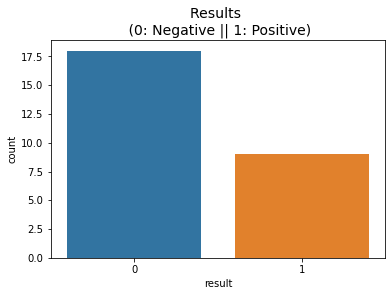

In [6]:
#sns.countplot('result', data=df)
ax= sns.countplot(x="result", data=df, order=[0,1])
plt.title('Results \n (0: Negative || 1: Positive)', fontsize=14)
plt.show()

In [9]:
print('Covid Negative', round(df['result'].value_counts()[0]))
print('Covid Positive', round(df['result'].value_counts()[1]))
print('\r')
print('Covid Negative', round(df['result'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Covid Positive', round(df['result'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Covid Negative 18
Covid Positive 9

Covid Negative 66.67 % of the dataset
Covid Positive 33.33 % of the dataset


In [10]:
print("The accuracy of the classifier : "+ str((284315-492)/284315)+ " which is the number of good classification")

The accuracy of the classifier : 0.998269524998681 which is the number of good classification


# Splitting Data

In [11]:
X = df.drop(labels='result', axis=1) # Features
y = df.loc[:,'result']  

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)


In [20]:
print(X_train.shape)
print(X_test.shape)

(21, 19)
(6, 19)


# Confusion Matrix function

In [21]:
#this will be removed from final .py file as it is not required to present this
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names=np.array(['0','1'])

# Logical Regression (Model 1)

In [22]:
from sklearn.linear_model import LogisticRegression  #importing model

In [23]:
lr = LogisticRegression()  #initializing the model
lr.fit(X_train, y_train)  #fitting train data

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)  #using predict function

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



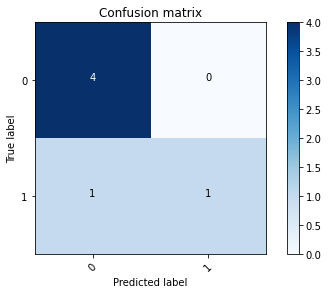

In [25]:
plot_confusion_matrix(cm,class_names)   #for confusion matrix (not needed in final)
print(classification_report(y_test,y_pred))

In [26]:
from sklearn.metrics import accuracy_score   #testing accuracy
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.8333333333333334


### All Models will be applied the same way

# Decision Tree (Model 2)

In [27]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Classifier (2.1)

In [29]:
clf=DecisionTreeClassifier()

In [30]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



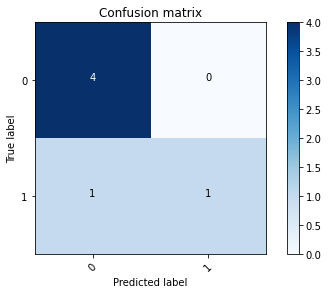

In [32]:
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [33]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.8333333333333334


### Regression (2.2)

In [41]:
clf = DecisionTreeRegressor()

In [42]:
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
y_pred= clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



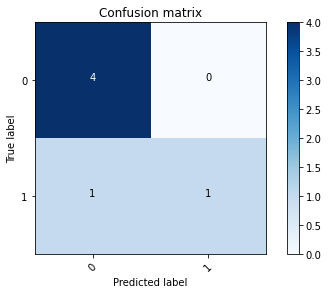

In [44]:
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [45]:
acc_ts=accuracy_score(y_pred, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 0.8333333333333334


#  SVM (Model 4)

In [46]:
from sklearn import svm

In [47]:
clf= svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



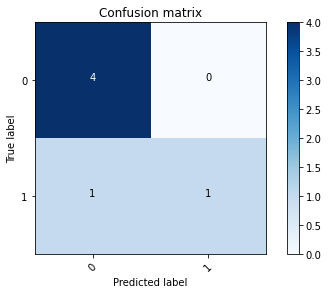

In [50]:
plot_confusion_matrix(cm,class_names)
print(classification_report(y_test,y_pred))

In [51]:
acc_ts=accuracy_score(y_pred, y_test)
print('TestAccuracy',acc_ts)

TestAccuracy 0.8333333333333334


# Conclusion

Since due to non availability of accurate data the accuracy acheived was only 83.33% even after trying differnt models